# Emerging Tech - Exploratory Data Analysis

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

### Import CSV data

In [4]:
tweets = pd.read_csv\
("twitter.csv", encoding='latin-1', sep=';',header=0,\
 names=['StringDate', 'Days', 'From', 'Tweet'])\
.filter(items=['Days', 'From', 'Tweet'])
tweets.head()

,Days,From,Tweet
0,1458,@NautilusMag,The Frankfurt airport forms a special kind of ...
1,1456,@NautilusMag,"In our new chapter, we look at things that pus..."
2,1455,@NautilusMag,"We don't play favorites with our readers, but ..."
3,1455,@NautilusMag,"There can be no science without fancy, no art..."
4,1455,@NautilusMag,The life and work of the novelist Vladimir Nab...


In [5]:
len(tweets)

645981

### Fix Date

In [6]:
def days_to_date(srl_no):
    days = int(srl_no-1)
    #csv initial day is 1st jan 2010
    new_date = datetime.datetime(2010,1,1,0,0) + datetime.timedelta(days)
    return new_date

In [7]:
tweets['Days'] = tweets['Days'].apply(days_to_date)

In [8]:
tweets.columns=['Date', 'From', 'Tweet']

In [9]:
tweets.tail()

,Date,From,Tweet
645976,2019-04-02,@DARPA,One surprising branch of research applies mach...
645977,2019-04-02,@DARPA,Check out BTO's research portfolio at https://...
645978,2019-04-02,@DARPA,Our Biological Technologies Office turned 5 ye...
645979,2019-04-01,@DARPA,What's old is new! With increasing risks to di...
645980,2019-04-01,@DARPA,Machine learning for human language technology...


### Tweets by Source

In [10]:
tweets['From'].unique(), len(tweets['From'].unique())

(array(['@NautilusMag', '@TheFuturist007', '@ReutersTech', '@technology',
        '@fttechnews', '@SAI', '@futureshift', '@HuffPostTech',
        '@techreview', '@BBCTech', '@guardiantech', '@mashable',
        '@engadget', '@verge', '@ForbesTech', '@TechCrunch', '@WiredUK',
        '@WIRED', '@DARPA'], dtype=object), 19)

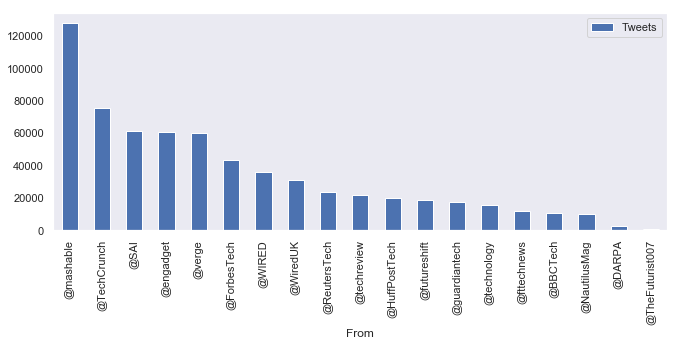

In [11]:
chart = tweets.groupby(['From']).count().filter(items=['Tweet'])
chart.columns=['Tweets']
chart.sort_values(['Tweets'], ascending=False).plot(kind='bar', grid=False)# ,logy=True

In [12]:
tweets = tweets[tweets['From']!='@mashable']


### Tweets by Date

In [13]:
#From fastai date feature engineering
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [14]:
add_datepart(tweets, 'Date', False)

In [15]:
tweets = tweets.reset_index()

In [16]:
tweets = tweets.set_index('Date').sort_index()

In [17]:
tweets.head()

,index,From,Tweet,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
Date,,,,,,,,,,
2010-01-01,65285,@SAI,Top 10 Objectively Biggest Tech Stories Of 200...,2010,1,53,1,4,1,1262304000
2010-01-01,195166,@guardiantech,Silicon Valley campaign seeks startup visa for...,2010,1,53,1,4,1,1262304000
2010-01-01,502284,@TechCrunch,2010: My Fifth Annual List Of The Tech Product...,2010,1,53,1,4,1,1262304000
2010-01-01,502285,@TechCrunch,Namebench: Google's 20% Project To Find The Fa...,2010,1,53,1,4,1,1262304000
2010-01-01,502286,@TechCrunch,Six New Years Resolutions For Apple And The iP...,2010,1,53,1,4,1,1262304000


In [18]:
chart = tweets.groupby(['Date']).count().filter(items=['Tweet'])
chart.columns=['Tweets']

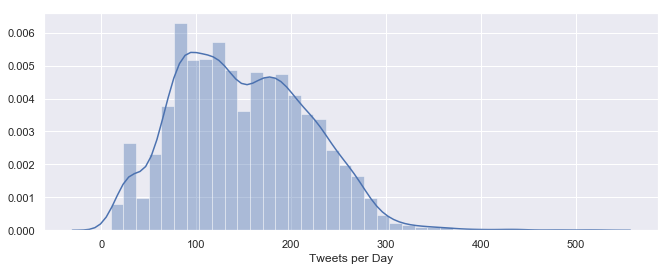

In [19]:
sns.distplot(chart['Tweets'], axlabel='Tweets per Day')

Text(0, 0.5, 'Tweets per Day')

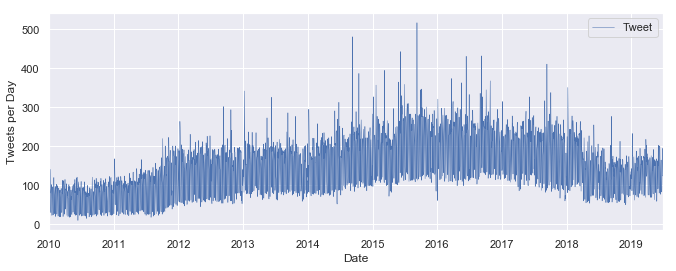

In [20]:
chart = tweets.groupby(['Date']).count().filter(items=['Tweet']).plot(linewidth=0.5)
chart.set_ylabel('Tweets per Day')

Text(0, 0.5, 'Tweets per Week')

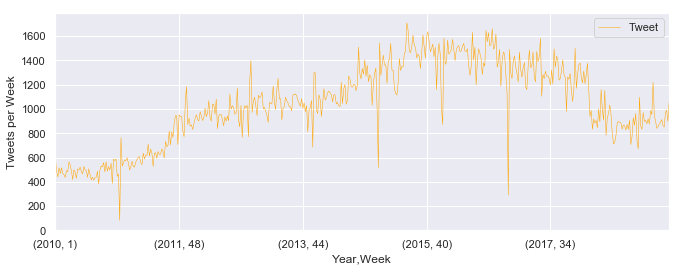

In [21]:
chart = tweets.groupby(['Year', 'Week']).count().filter(items=['Tweet']).plot(linewidth=0.5, color='orange')#marker='o', linestyle='-'
chart.set_ylabel('Tweets per Week')

# chart.xaxis.set_major_locator(ticker.MultipleLocator(52))
# chart.xaxis.set_minor_locator(ticker.MultipleLocator(26))

# chart.xaxis.set_major_locator()
# chart.xaxis.set_major_locator(mdates.MonthLocator())
# chart.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Text(0, 0.5, 'Tweets per Month')

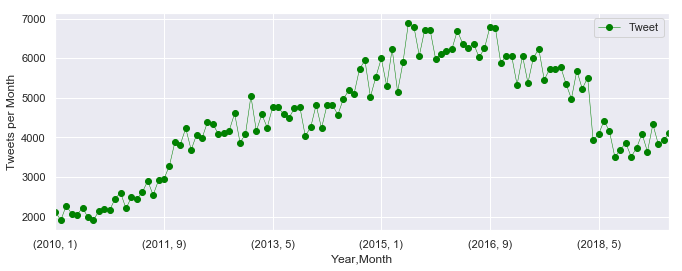

In [22]:
chart = tweets.groupby(['Year', 'Month']).count().filter(items=['Tweet']).plot(linewidth=0.5, marker='o', linestyle='-',color='green')#marker='o', linestyle='-'
chart.set_ylabel('Tweets per Month')
# chart.xaxis.set_major_locator(mdates.YearLocator())
# chart.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));